In [1]:
import pandas as pd
import numpy as np
import pyarrow
import time

In [2]:
#pd.show_versions()

In [3]:
bytes_list=[1000000]
# bytes_list=list(range(100,10000000,10000)) ## Customize this as per your RAM capabilities
# On my machine, 1000000 bytes produces a csv file of 0.2GB

In [4]:
def random_dates(start, end, n, unit='D', seed=0):
    
    np.random.seed(seed)

    ndays = (end - start).days + 1
    return pd.to_timedelta(np.random.rand(n) * ndays, unit=unit) + start

In [5]:
for byte_size in bytes_list:
    data_list=[['Nic','Wilson',70,'Boston',True,'A1',87.8],['John','Barman',40,'Cambridge',False,'B2',98.8],['Maryam','Wagner',50,'Edison',True,'C4',30],
            ['Melissa','Johnson',2,'Saratoga',True,'A3',67.4],['Trisha','Ellis',30,'Medway',False,'D5',77.3],['Mike','Hiltz',35,'Brighton',False,'D1',80]]
    df=pd.DataFrame(data_list, columns=['First Name','Last Name','Age','City','Employed','Room Number','Marks'])
    np.random.seed(0)
    start = pd.to_datetime('2011-01-01')
    end = pd.to_datetime('2022-01-01')
    df=pd.concat([df]*byte_size, ignore_index=True) # Ignores the index

    df['Birth Date']=pd.to_datetime(random_dates(start, end, len(df)).date)
    display(df)
    print(df.dtypes)


,First Name,Last Name,Age,City,Employed,Room Number,Marks,Birth Date
0,Nic,Wilson,70,Boston,True,A1,87.8,2017-01-14
1,John,Barman,40,Cambridge,False,B2,98.8,2018-11-14
2,Maryam,Wagner,50,Edison,True,C4,30.0,2017-08-19
3,Melissa,Johnson,2,Saratoga,True,A3,67.4,2016-12-29
4,Trisha,Ellis,30,Medway,False,D5,77.3,2015-08-30
...,...,...,...,...,...,...,...,...
5999995,John,Barman,40,Cambridge,False,B2,98.8,2012-12-04
5999996,Maryam,Wagner,50,Edison,True,C4,30.0,2013-08-14
5999997,Melissa,Johnson,2,Saratoga,True,A3,67.4,2016-01-10
5999998,Trisha,Ellis,30,Medway,False,D5,77.3,2021-10-01


First Name             object
Last Name              object
Age                     int64
City                   object
Employed                 bool
Room Number            object
Marks                 float64
Birth Date     datetime64[ns]
dtype: object


In [6]:
start=time.time()
df.to_csv('try_1.csv',index=False)
end=time.time()
time_taken_csv=end-start
print(time_taken_csv)


11.747460126876831


In [7]:

start=time.time()
df.to_json('try_2.json', orient='records')

end=time.time()
time_taken_json=end-start
print(time_taken_json)



4.654402256011963


In [8]:

start=time.time()
df.to_parquet('try_3.parquet', engine='pyarrow')
end=time.time()
time_taken_parquet=end-start
print(time_taken_parquet)



1.1175100803375244


In [9]:
from pathlib import Path
  
size_csv = Path('try_1.csv').stat().st_size
size_json = Path('try_2.json').stat().st_size
size_parquet = Path('try_3.parquet').stat().st_size
  
print(size_csv)
print(size_json)
print(size_parquet)

290000068
872000001
9724338


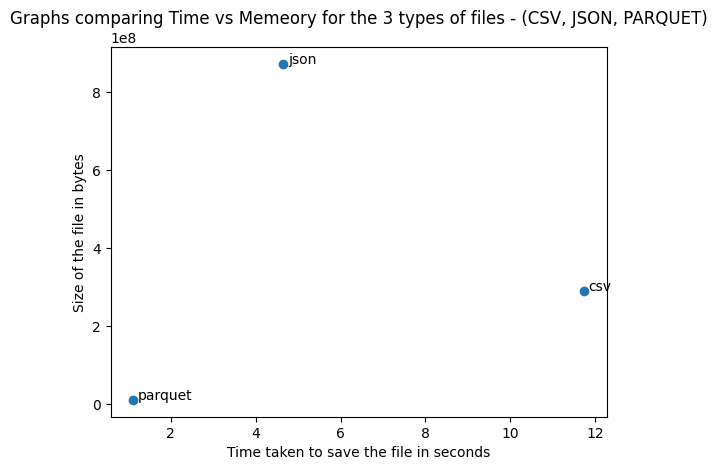

In [10]:
import datetime
import random
import matplotlib.pyplot as plt

# make up some data
x = [time_taken_csv,time_taken_json,time_taken_parquet]
y = [size_csv,size_json,size_parquet]
labels=['csv','json','parquet']

# plot
plt.plot(x,y,'o')
plt.xlabel('Time taken to save the file in seconds')
plt.ylabel('Size of the file in bytes')
plt.title('Graphs comparing Time vs Memeory for the 3 types of files - (CSV, JSON, PARQUET)')
#plt.text(labels)
# for xy in zip(x,y):
#    plt.annotate('(%.2f, %.2f)' % xy, xy=xy)
for i in range(len(labels)):
    plt.text(x[i]+0.1,y[i],'{}'.format(labels[i]))
# beautify the x-labels
#plt.gcf().autofmt_xdate()

plt.show()